In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
upload1 = files.upload()
train = pd.read_csv("train.csv")
# upload2 = files.upload()
test = pd.read_csv("test.csv")

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.drop(["Name","Ticket","Cabin","PassengerId"], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
test.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


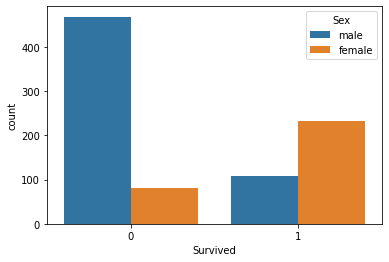

In [8]:
sns.countplot(x="Survived", data=train, hue="Sex")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


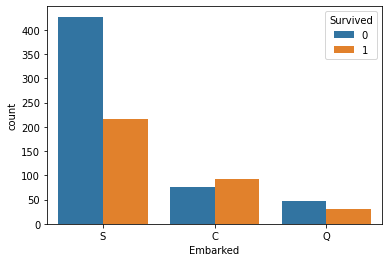

In [9]:
sns.countplot("Embarked", data=train, hue="Survived")

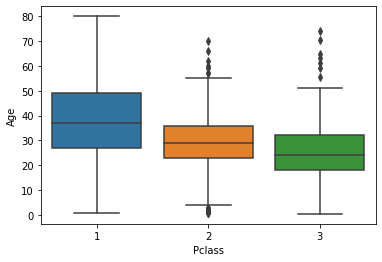

In [10]:
sns.boxplot(x="Pclass", y="Age", data=train)
# as you see, class1 ave age is 30, class2 is 30, class3 is 25 approximately 

In [11]:
# fill the nan values in age
train.loc[(train["Age"].isnull())& (train["Pclass"]==1), "Age"] = 37
train.loc[(train["Age"].isnull())& (train["Pclass"]==2), "Age"] = 29
train.loc[(train["Age"].isnull())& (train["Pclass"]==3), "Age"] = 24 # these are median values, i couldnt able to assign them directly

In [12]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
train.dropna(inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [15]:
gender = pd.get_dummies(train["Sex"])
pclass = pd.get_dummies(train["Pclass"], prefix="pclass")
embark = pd.get_dummies(train["Embarked"])
train = pd.concat([train, gender, pclass, embark], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1


In [16]:
# multicollinearity, if male is 1, then its pretty obvious that female is 0 so keep only one from gender class, similar to pclass class
train_data = train.drop(["Pclass","Sex","Embarked"], axis=1)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,female,male,pclass_1,pclass_2,pclass_3,C,Q,S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [17]:
x = train_data.drop("Survived", axis=1)
y = train_data.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(711, 12)
(178, 12)
(711,)
(178,)


# Gradient Boosting Classifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [20]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=10)
gbc.fit(x_train, y_train)
print(gbc.score(x_train, y_train))
print(gbc.score(x_test, y_test))

0.9071729957805907
0.8202247191011236


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.66      0.74        68

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



In [24]:
from sklearn.model_selection import GridSearchCV
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100)
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(x_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(x_test,y_test))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 400}
Train Score: 0.8171856154383291
Test Score: 0.8258426966292135


In [25]:
grid = {
    'max_depth':np.arange(1,5,1)
}

gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=400)
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(x_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(x_test,y_test))

Best Parameters: {'max_depth': 3}
Train Score: 0.8157890560528154
Test Score: 0.8258426966292135


In [26]:
gbc2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=400, max_depth=3)
gbc2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=400)

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=10)

In [ ]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
# check the accuracy
dt_model.score(x_train, y_train)

0.9819819819819819

In [ ]:
# accuracy on the test data
dt_model.score(x_test, y_test)

0.7713004484304933

In [ ]:
# lets try changing the thrushold, default = 0.5
new_predict = []
y_pred_prob = dt_model.predict_proba(x_test)[:,1]
for i in range(len(y_pred_prob)):
  if y_pred_prob[i] < 0.6:
    new_predict.append(0)
  else:
    new_predict.append(1)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, new_predict))

0.7713004484304933


In [ ]:
# lets try changing the depth of the tree
train_accu = []
test_accu = []
for depth in range(1,11):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
  dt_model.fit(x_train, y_train)
  train_accu.append(dt_model.score(x_train, y_train))
  test_accu.append(dt_model.score(x_test, y_test))

In [ ]:
accuracy_frame = pd.DataFrame({"max_depth": range(1,11), "train_accu": train_accu, "test_accu": test_accu})
accuracy_frame

,max_depth,train_accu,test_accu
0,1,0.795796,0.757848
1,2,0.806306,0.762332
2,3,0.833333,0.793722
3,4,0.843844,0.780269
4,5,0.849850,0.739910
5,6,0.887387,0.766816
6,7,0.902402,0.775785
7,8,0.914414,0.798206
8,9,0.929429,0.793722
9,10,0.939940,0.798206


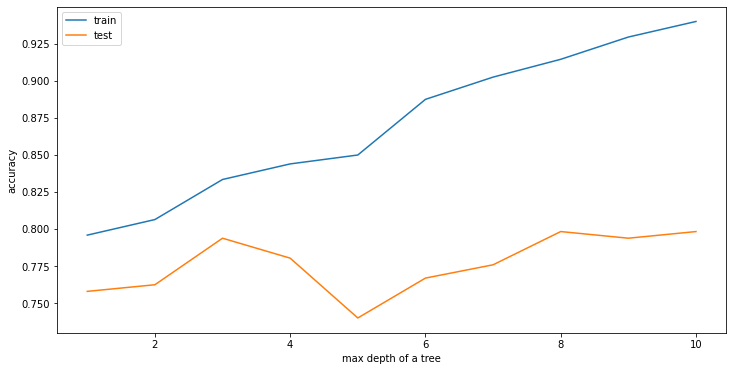

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(accuracy_frame["max_depth"], accuracy_frame["train_accu"], label="train")
plt.plot(accuracy_frame["max_depth"], accuracy_frame["test_accu"], label="test")
plt.xlabel("max depth of a tree")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
# lets train the DT model again with optimization
dt_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25, random_state=10)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25, random_state=10)

In [ ]:
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

0.8333333333333334
0.7937219730941704


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr = LogisticRegression()
logr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# train accuracy
from sklearn.metrics import accuracy_score
y_pred_train = logr.predict(x_train)
print(accuracy_score(y_train, y_pred_train)) 

0.790436005625879


In [ ]:
y_pred_test = logr.predict(x_test)
print(accuracy_score(y_test, y_pred_test))

0.848314606741573


# Random Forest Classifier

In [ ]:
#lets try with randomforest with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
grid_search = GridSearchCV(estimator=rand,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.822839261236563

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [ ]:
# create the best sutied model for my predictions
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf_pred_train = rf.predict(x_train)
print(accuracy_score(y_train, rf_pred_train))

0.8753753753753754


In [ ]:
rf_pred_test = rf.predict(x_test)
print(accuracy_score(y_test, rf_pred_test))

0.7937219730941704


# Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# create an ADA model with default setting, that is Decision Tree as its base model
ada_m = AdaBoostClassifier(n_estimators=100, learning_rate=0.3)
ada_m.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=100)

In [ ]:
print(ada_m.score(x_train, y_train))
print(ada_m.score(x_test, y_test))

0.8227848101265823
0.8370786516853933


In [ ]:
# ada boosting with change hyperparameter of DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25, random_state=10)

In [ ]:
ada_m2 = AdaBoostClassifier(n_estimators=100, base_estimator=dt, learning_rate=0.1)
ada_m2.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         max_leaf_nodes=25,
                                                         random_state=10),
                   learning_rate=0.1, n_estimators=100)

In [ ]:
print(ada_m2.score(x_train, y_train))
print(ada_m2.score(x_test, y_test))

0.9324894514767933
0.8202247191011236


# predictions

In [27]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [28]:
print(test.loc[test["Pclass"]==1, "Age"].median())
print(test.loc[test["Pclass"]==2, "Age"].median())
print(test.loc[test["Pclass"]==3, "Age"].median())

42.0
26.5
24.0


In [29]:
# fill the nan values in age
test.loc[(test["Age"].isnull())& (test["Pclass"]==1), "Age"] = 42
test.loc[(test["Age"].isnull())& (test["Pclass"]==2), "Age"] = 26.5
test.loc[(test["Age"].isnull())& (test["Pclass"]==3), "Age"] = 24

In [30]:
test.loc[test["Fare"].isnull(),"Fare"] = test.Fare.mean()

In [31]:
gender2 = pd.get_dummies(test["Sex"])
pclass2 = pd.get_dummies(test["Pclass"], prefix="pclass")
embark2 = pd.get_dummies(test["Embarked"])
test = pd.concat([test, gender2,pclass2, embark2], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0,0,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,1,0,0,0,1,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,0,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,1,0,0,0,1,0,0,1


In [32]:
#multicollinearity
passenger = test.iloc[:,0]
test_data = test.drop(["Pclass","Sex","Embarked", "PassengerId"], axis=1)
test_data.head()

,Age,SibSp,Parch,Fare,female,male,pclass_1,pclass_2,pclass_3,C,Q,S
0,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [33]:
prediction = gbc2.predict(test_data)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
sub = pd.DataFrame({"PassengerId": passenger, "Survived": prediction})
sub.to_csv("Submission.csv", index=False)

In [35]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [36]:
files.download("Submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>